# Machine Learning and Statistics
## Boston Housing dataset - Assginment

This assignment is divided into 3 Sections

- Section 1 : Boston Housing Data Describtion
- Section 2 : Inference
- Section 3 : Prediction
- Section 4 : References

 

### Section 1: Data Description

The Boston housing dataset is taken from the Kaggle site and stored in the project assessment GIT repository. This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. The original information orginated from StatLib archive. The dataset set contains 506 entries and 14 parameters/variables/features.

The 14 features in the dataset are mentioned below

- crim   : per capita crime rate by town.
- zn     : proportion of residential land zoned for lots over 25,000 sq.ft.
- indus  : proportion of non-retail business acres per town.
- chas   : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox    : Nitrogen oxides concentration (parts per 10 million).
- rm     : average number of rooms per dwelling.
- age    : proportion of owner-occupied units built prior to 1940.
- dis    : weighted mean of distances to five Boston employment centres.
- rad    : index of accessibility to radial highways.
- tax    : full-value property-tax rate per \USD 10,000.
- ptratio: pupil-teacher ratio by town.
- black  : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- lstat  : lower status of the population (percent).
- medv   : median value of owner-occupied homes in \USD 1000s.


In [58]:
#Load pandas library. 
#create a dataframe using the Boston housing data (df_BHD) 
#DDescribe the Data

import pandas as pd
df_BHD = pd.read_csv("data\data.csv")
df_BHD.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- The above table provides key description of the data
    - Number of data entries in the data set [count]
    - Average/Mean of the each column of data in the data set [mean]
    - Standard diviation from from the mean of the data set [std]
    - Minimum value of the data in the data set [min]
    - Maximum value of the data in the data set [max]
    
- Seabourne distribution plot is used to determine which independent variable to be used within the Boston Housing dataset
- Based on the given data and the seabourne distribution plot of the data, the below independent variables doesn't seem to be related to medianvalue of the house
    - the crime rate
    - proporation of non-retail business acres
    - age of the house owners
    - distance of the five Boston employment town centres
    - index of accessibility to raidal highways
    - property tax rate
    - Proproation of blacks by towbn


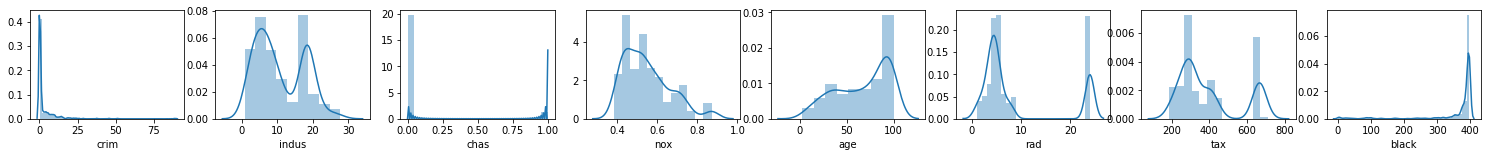

In [59]:
# distribution plot of the independent variables to see which one to pick-up
fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1, 8,figsize=(26,2))
sns.distplot(df_BHD_subset['crim'],ax=ax1)
sns.distplot(df_BHD_subset['indus'],ax=ax2)
sns.distplot(df_BHD_subset['chas'],ax=ax3)
sns.distplot(df_BHD_subset['nox'],ax=ax4)
sns.distplot(df_BHD_subset['age'],ax=ax5)
sns.distplot(df_BHD_subset['rad'],ax=ax6)
sns.distplot(df_BHD_subset['tax'],ax=ax7)
sns.distplot(df_BHD_subset['black'],ax=ax8)

### Data Description & Inference : Number of Bedrooms and Median Value of the homes
- Median Value of the homes is the dependent variable and the rest of the features in the dataset are indepedent variables
- Plot the Median value of the homes and number of bedrooms using seaborn plot to identify any outliers

C:\Users\soman\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


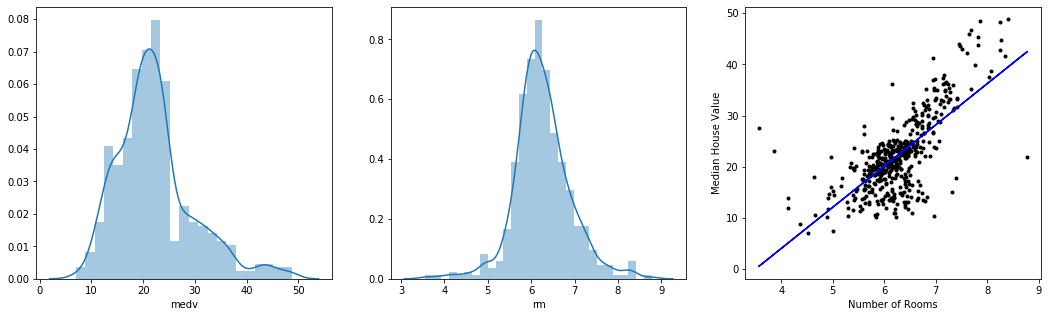

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,5))

# plot the median house value against the number of rooms
# remove the outliers. Consider only the data that are with median house of 49 and below
# Remove 20 outlier rows from the dataset
# House price less than 10 M where the number of rooms are greater than zero
# Median value of the about 49M and the number of l

#Copy of the dataset.orginal data set
df_BHD_subset = df_BHD

df_BHD_sub = df_BHD[(df_BHD['medv'] < 10) & (df_BHD['rm'] > 5 ) ]
for row in df_BHD_sub.index:
    df_BHD_subset = df_BHD_subset.drop(row)

df_BHD_subset = df_BHD_subset[(df_BHD['medv'] < 49)]
                                              
sns.distplot(df_BHD_subset['medv'],ax=ax1)
sns.distplot(df_BHD_subset['rm'],ax=ax2)

# plot the data (number of rooms  versis  Median House value)
ax3.plot(df_BHD_subset['rm'],df_BHD_subset['medv'],'k.', label='Original data')

#Calcuate the polyfit co-efficients using numpy
#the value of m is 8.05 and the value of c is -28.18
m,c = np.polyfit(df_BHD_subset['rm'],df_BHD_subset['medv'], 1)

#plot the fitted line
ax3.plot(df_BHD_subset['rm'],((8.05 * df_BHD_subset['rm']) -28.18),'b-', label='Best fit line')

plt.xlabel('Number of Rooms')
plt.ylabel('Median House Value')

# Show the plot.
plt.show()


In [89]:
np.polyfit(df_BHD_subset['rm'],df_BHD_subset['medv'], 1)

array([  8.05466675, -28.17761105])

####  R-Squred value  ::   Number of Bedrooms and Median Value of the homes


In [90]:
# Import packages and classes from sklearn
# Use the corrected data (outliers removed)
# Create model and fit the curve/line
# print the results

from sklearn.linear_model import LinearRegression
y = df_BHD_subset['rm'].values
y = y.reshape((-1,1))
x = df_BHD_subset['medv'].values
x = x.reshape((-1,1))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)



coefficient of determination: 0.5001095298788084
intercept: [4.8796504]
slope: [[0.06208941]]


#### Key Findings  ::   Number of Bedrooms and Median Value of the homes 
- The median value of the house is normally distributed with few outliers especially around the value 50
- The intial distribution showed outlier data around median house value = 50. There are 16 entries of outlier data is removed from the dataset. 
- The data is distributed around the median house value 20
- The stright line can be expressed in the format y= mx + c. Using polyfit function, the values of m is calucated as 8.05 and the value of c is -28.18. The stright line seems to roughly fits the data.
- R-Squred values
   - coefficient of determination: 0.5001095298788084
   - intercept: 4.8796504
   - slope: 0.06208941


### Data Description & Inference : Lower status of the population (lstat) and Median Value of the homes
- Median Value of the homes is the dependent variable and the rest of the features in the dataset are indepedent variables
- Plot the Median value of the homes and lstat using seaborn plot to identify any outliers

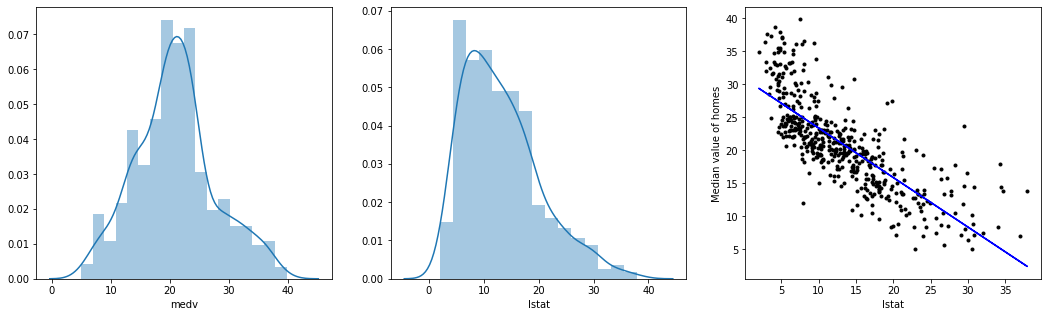

In [82]:

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(18,5))

# plot the median house value against the lstat
# remove the outliers. 
#Copy of the dataset.orginal data set

df_BHD_slstat = df_BHD[(df_BHD['medv'] <40)]
                                              
sns.distplot(df_BHD_slstat['medv'],ax=ax1)
sns.distplot(df_BHD_slstat['lstat'],ax=ax2)

# plot the data (number of rooms  versis  Median House value)
ax3.plot(df_BHD_slstat['lstat'],df_BHD_slstat['medv'],'k.', label='Original data')

#Calcuate the polyfit co-efficients using numpy
#the value of m is -0.84 and the value of c is 32.54
np.polyfit(df_BHD_slstat['lstat'],df_BHD_slstat['medv'], 1)

#plot the fitted line
ax3.plot(df_BHD_slstat['lstat'],((-0.75 * df_BHD_slstat['lstat']) + 30.84),'b-', label='Best fit line')

plt.xlabel('lstat')
plt.ylabel('Median value of homes')

# Show the plot.
plt.show()



####  R-Squred value  ::   Lower Status of population and Median Value of the homes

In [84]:
# Import packages and classes from sklearn
# Use the corrected data (outliers removed)
# Create model and fit the curve/line
# print the results

from sklearn.linear_model import LinearRegression
y = df_BHD_slstat['lstat'].values
y = y.reshape((-1,1))
x = df_BHD_slstat['medv'].values
x = x.reshape((-1,1))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)



coefficient of determination: 0.600848885538303
intercept: [29.90743951]
slope: [[-0.79880106]]


#### Key Findings  ::   Lower status of population and Median Value of the homes 
- The median value of the house is normally distributed with few outliers especially around the value 50
- The data is distributed around the median house value 20
- The stright line can be expressed in the format y= mx + c. Using polyfit function, the values of m is calucated as -.75 and the value of c is 30.84. The stright line seems to roughly fits the data.
- R-Squred values
   - coefficient of determination: 0.600848885538303
   - intercept: 29.90743951
   - slope: -0.79880106


# References


- Boston Housing Dataset - The dataset used in this notebook is taken from the below site
  - [https://www.kaggle.com/c/boston-housing](https://www.kaggle.com/c/boston-housing)
  - [https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
  - [http://lib.stat.cmu.edu/datasets/boston](http://lib.stat.cmu.edu/datasets/boston)

- Real Python - The information in this site is extensively used for description & inference section of this assignment
    - [https://realpython.com/linear-regression-in-python](https://realpython.com/linear-regression-in-python)
    
- 